# **Zooming SlowMo 4 Microscopy**

[**TUTORIAL Video **](https://youtu.be/xymw0ZRF8Xo): **WATCH THAT BEFORE USING IT**!!!



---


<font size = 4> "Zooming SlowMo" is a network capable of interpolating images in series along the T and/or Z-dimension while simultaneously increasing the image resolution. This particular notebook allows the user to perform zooming-interpolation of **3D+t or 2D+t** microscopy images in **grayscale or RGB** which means it **improves the image resolution up to a factor of 8** and increasing the **frame frequency in T- and Z-dimension by a factor of 2**  

---
<font size = 4> e.g. Image input dimensions: (t,z,x,y) 10:15:256:256 -> Image output dimensions: 19:29:1024:1024

<font size = 4> or Image input dimensions: (t,z,x,y,c) 10:15:256:256:3 -> Image output dimensions: 19:29:1024:1024:3

---

<font size = 4>This can be achieved by using a pretrained model or/and by fine-tuning our pretrained model with your data.

<font size = 4> It was first published in the context of space-time video super-resolution in 2020 under the name "Zooming-Slow-Mo: Fast and Accurate One-Stage Space-Time Video Super-Resolution" by Xiaoyu Xiang, Yapeng Tian, Yulun Zhang, Yun Fu, Jan P. Allebach, Chenliang Xu in Institute of Electrical and Electronics Engineers (IEEE).

[URL](https://openaccess.thecvf.com/content_CVPR_2020/html/Xiang_Zooming_Slow-Mo_Fast_and_Accurate_One-Stage_Space-Time_Video_Super-Resolution_CVPR_2020_paper.html)

The network used in this application is a combination of a deformable ConvLSTM with a deep reconstruction network which achieves state of the art quantitative and qualitative performance in the zoom-interpolation task.


---

<font size = 4>*Disclaimer*:

<font size = 4>This notebook is inspired from the *Zero-Cost Deep-Learning to Enhance Microscopy* project (ZeroCostDL4Mic) (https://github.com/HenriquesLab/DeepLearning_Collab/wiki) and was created by **Martin Priessner**

<font size = 4>This notebook is based on the following paper:


<font size = 4>The original source code found in: [here](https://github.com/Mukosame/Zooming-Slow-Mo-CVPR-2020)
The modified version of the paper's source code adapted for this Google Colab is found in: [here](https://github.com/mpriessner/Zooming-Slow-Mo-CVPR-2020)


<font size = 4>Example files for testing the algorithm can be found in the "Demo" folder in the downloaded repository after installing the dependencies.


<font size = 4>**Please also cite this original paper when using or developing this notebook.**

## **How to use this notebook?**

---

<font size = 4>Video describing how to use ZeroCostDL4Mic notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive you will find your files and folders here.

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in **Section 1.2**.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0.0 Before getting started**


---
<font size = 4> This notebook provides the opportunity for you to either use a throurougly pretrined network to perform the task on your provided dataset or to finetune the pretrined network with your data.


<font size = 4> The notebook may require a large amount of disk space. If training your own network with your own datasets, the available disk space on the user's google drive should contain at least 5-10GB.


---
<font size = 4>**Data Format**

<font size = 4> **The data used to train or test the ZS network can be the following: 3D stacks (TYX), 4D stacks (TZYX or TYXC) or 5D stacks (TZYXC) in .tiff (.tif) file format.** Furthermore the image need to be **8 bit**!!!


To use this notebook on user data, upload the data in the your google drive or google cloud storage and execute the notebook cells step by step following the instructions in the associated section.

<font size = 4> **Note: Your *dataset_folder* should not have spaces or brackets in its name as this is not recognized by the code and will throw an error**

<font size = 4> - Training/Finetuning needs to be completet within 12h (for free Colab) 24h (for Colab Pro) - therefore it is recommended to do smaller training batches and keep continuing training the network. A copy of the pretrained network folder will be saved in a selected folder on your gdrive.


<font size = 4>- In the folder `ZS4Mic/demo/example` there is one 5D (TZYXC) file that you can use to discover the possibilities of this network.




<font size = 4>**Important notes**

<font size = 4>- If when running the first cell the following error occurs "not authored by google" just press "Run anyways"

<font size = 4>- If for some reason the notebook crashes and you cannot continue at all, you can first try to restart the runtime at `Runtime` -> `Restart Runtime`. This will delete all the variables and will reload all the libraries. (No re-install required). If that doesn't work you can perform a factory reset   `Runtime` -> `Factory reset runtime`. This will start a new virtual machine in the cloud and requires a new installation of the tool.

<font size = 4>- If you wish to **Train or finetune a network** using your own dataset (and we encourage everyone to do that), you will need to run **Sections 4**

<font size = 4>- If you plan to train or finetune the network on a very big dataset (more than 10 GB) we recommend to perform the training data preparation with offline on your PC running the python scrips provided in the following folder: `ZS4Mic/codes/data_scripts/ZI_data_prep_scripts_modified`

<font size = 4>- If you only wish to **run interpolation or/and resolution upscaling** using a pretrained model (provided in the pretrained folder or previously generated by you and saved on your Google Drive), you will need to run **Sections 2** to set up the notebook and then **Section 5** to perform the interpolation.

<font size = 4>- If you want to **check the quality** of the network first run the **downsampling and/or downscaling option in section 3** and perform the image enhancement on the downsampled or low resolution image. The result can then be compared with the ground truth image in **Section 6**.

<font size = 4>- When first connecting the notebook there will be warning saying "not authored by google" which can be ignored and just click "connect" to start with the notebook


---


# **1. Initialise the Colab session**
---


### **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelator: GPU** *(Graphics processing unit)*

<font size = 4>**IMPORTANT NOTE:** *This notebook does not work with the K80 GPU*


In [ ]:
#@markdown ##Run this cell to check if you have GPU access
# %tensorflow_version 1.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.')
  print('Did you change your runtime ?')
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

GPU is available


### **1.2. Mount your Google Drive or Google Cloud Bucket**
---
<font size = 4> To use this notebook on the data present in your Google Drive,  or your Google Cloud Bucket you need to mount your Google Drive or Google Cloud Bucket to this notebook.

<font size = 4> Play one of the two the cells below to mount your Google Drive  or Google Cloud Bucket and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. For Google Cloud Bucket you need to provide your bucket_name and project_id.

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Alternative for Google Drive - Google Cloud Storage (paid account necessary)

In [ ]:
#@markdown ##Play the cell to connect your Google Cloud Bucket

#@markdown * Click on the URL.

#@markdown * Sign in your Google Account.

#@markdown * Copy the authorization code.

#@markdown * Enter the authorization code.

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive".

# mount user's Cloud to Google Colab.
import uuid
from google.colab import auth
from IPython.display import clear_output
import os
os.chdir("/content")

auth.authenticate_user()
project_id = "your-project_ID" #@param {type:"string"}
bucket_name = "your_bucket_name" #@param {type:"string"}
bucket_name = bucket_name + str(uuid.uuid1())
!gcloud config set project {project_id}
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
!mkdir Google_Cloud
!gcsfuse --implicit-dirs martin_phd_project_data /content/Google_Cloud
clear_output()

#@markdown Before running the code make sure that you change the name of your bucket in the second last line of this cell: `!gcsfuse --implicit-dirs your_bucket_name /content/Google_Cloud`



# **2. Install ZoomInterpolation network and dependencies**
---


In [ ]:
#@title ### Install the requirements
#@markdown By running the cells the system requirements, libraries and the network are downloaded and installed .
#@markdown This whole process may take 5-10 minutes and **will automatically restart the runtime** after finishing to load the necessary python modules correctly.
#@markdown It already includes some basic demo files of simulated particles in the following folder `ZS4Mic/demo`
import os
import shutil

!rm -rf "ZS4Mic"
!rm -rf "/content/DCNv2.egg-info"
!rm -rf "/content/build"
os.chdir("/content")
# !git clone --recursive https://github.com/mpriessner/Zooming-Slow-Mo-CVPR-2020.git ZoomInterpolation2
!git clone https://github.com/mpriessner/CAFI.git
shutil.move("/content/CAFI/ZS4Mic", "ZS4Mic")
shutil.rmtree("/content/CAFI")
#new install
!pip install lmdb
!wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
!chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
!bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import os
import shutil
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

!conda install ipykernel -y
!conda install -c conda-forge opencv -y
!pip install lmdb
#!pip install torch==1.4.0 torchvision==0.5.0 #?
!pip install aicsimageprocessing
!pip install aicsimageio==3.2.3
!pip install tifffile
!pip install pympler


!rm -rf "ZS4Mic"
!rm -rf "/content/DCNv2.egg-info"
!rm -rf "/content/build"
os.chdir("/content")
# !git clone --recursive https://github.com/mpriessner/Zooming-Slow-Mo-CVPR-2020.git ZoomInterpolation2
!git clone https://github.com/mpriessner/CAFI.git
shutil.move("/content/CAFI/ZS4Mic", "ZS4Mic")
shutil.rmtree("/content/CAFI")

!pip install -r ZS4Mic/requirements.txt
!pip install scipy==1.1.0

!python ZS4Mic/codes/models/modules/DCNv2/setup.py build develop

In [2]:
import os

proxy = 'http://10.177.64.146:7890'

os.environ['HTTP_PROXY'] = proxy
os.environ['HTTPS_PROXY'] = proxy

# Download pretrained models
import sys
import os
sys.path.insert(0,'ZS4Mic/load_functions')
from download_from_gdrive import download_file_from_google_drive
file_1x= "16tsx1bKI8oRfp2eWGMgVkBwmoflQ81PT"
file_2x = "178NfaFGm_T5FdNP1NXvjGDlRwjD7WA0C"
file_4x = "1BoW2r5RVy34GcYjm5PYhizwtrt6npQk3"
pretrained_1x = "/home/user2/project/CAFI/ZS4Micexperiments/pretrained_models/pretrained_1x.pth"
pretrained_2x = "/home/user2/project/CAFI/ZS4Micexperiments/pretrained_models/pretrained_2x.pth"
pretrained_4x = "/home/user2/project/CAFI/ZS4Micexperiments/pretrained_models/pretrained_4x.pth"
download_file_from_google_drive(file_1x, pretrained_1x)
download_file_from_google_drive(file_2x, pretrained_2x)
download_file_from_google_drive(file_4x, pretrained_4x)


In [3]:

# download demonstration files from simulated particle dataset
# Download demo file
path_example_GT = "/home/user2/project/CAFI/ZS4Micdemo/sim_particels_GT_512"
path_example_2DF_256 = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_256"
path_example_4DF_256 = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_2DF_256"
path_example_2DF_512 = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_512"
path_example_4DF_512 = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_2DF_512"

if not os.path.exists("/home/user2/project/CAFI/ZS4Micdemo"):
  os.mkdir("/home/user2/project/CAFI/ZS4Micdemo")
if not os.path.exists(path_example_GT):
  os.mkdir(path_example_GT)
if not os.path.exists(path_example_2DF_256):
  os.mkdir(path_example_2DF_256)
if not os.path.exists(path_example_4DF_256):
  os.mkdir(path_example_4DF_256)
if not os.path.exists(path_example_2DF_512):
  os.mkdir(path_example_2DF_512)
if not os.path.exists(path_example_4DF_512):
  os.mkdir(path_example_4DF_512)


example_GT = path_example_GT + "/sim_particles_GT_512.tif"
example_2DF_256 = path_example_2DF_256 + "/sim_particles_2DF_256.tif"
example_4DF_256 = path_example_4DF_256 + "/sim_particle_2DF_2DF_256.tif"
example_2DF_512 = path_example_2DF_512 + "/sim_particles_2DF_512.tif"
example_4DF_512 = path_example_4DF_512 + "/sim_particles_2DF_2DF_512.tif"

demo_file_GT = "1JQC78E0QBDbhiyNK-hPTYiiDWRkwfGd1"
demo_file_2DF_256 = "1gKtp6y0aoYwMEefzC2oMJbXzfi3c_cCr"
demo_file_4DF_256 = "1B1sls8n6irmjKkGNQculIe3M1ZeMEx2_"
demo_file_2DF_512 = "1OPLXzCbTAviRVNUPYh7r67AKRYgSHmHn"
demo_file_4DF_512 = "1CnMD97J-N9uP1letHwx7nMWgVCgroAdy"


download_file_from_google_drive(demo_file_GT, example_GT)
download_file_from_google_drive(demo_file_2DF_256, example_2DF_256)
download_file_from_google_drive(demo_file_4DF_256, example_4DF_256)
download_file_from_google_drive(demo_file_2DF_512, example_2DF_512)
download_file_from_google_drive(demo_file_4DF_512, example_4DF_512)

In [ ]:
#@title ### Run cell to avoid Google Colab disconnect while waiting
import time
time.sleep(4800)

##Download additional demo files (optional)

In [4]:
#@title ### Download additional demo files to play around with. After running this cell they will appear in the `ZS4Mic/demo` folder.
# Download demo file
import sys
import os
sys.path.insert(0,'ZS4Mic/load_functions')
from download_from_gdrive import download_file_from_google_drive
path_example_256 = "/home/user2/project/CAFI/ZS4Micdemo/example_1_256_5D"
path_example_128 = "/home/user2/project/CAFI/ZS4Micdemo/example_1_128_5D"

if not os.path.exists("/home/user2/project/CAFI/ZS4Micdemo"):
  os.mkdir("/home/user2/project/CAFI/ZS4Micdemo")
if not os.path.exists(path_example_256):
  os.mkdir(path_example_256)
if not os.path.exists(path_example_128):
  os.mkdir(path_example_128)

example_file_256 = path_example_256 + "/example_256.tif"
example_file_128 = path_example_128 + "/example_128.tif"
demo_file_256 = "1Wx_c05Z3IAZlCz5ybhiEO8zPWtr5BzGR"
demo_file_128 = "1ECeMd3J4R30nKmDijWqYuPrWk0Cq_FIa"
download_file_from_google_drive(demo_file_256, example_file_256)
download_file_from_google_drive(demo_file_128, example_file_128)


os.mkdir("/home/user2/project/CAFI/ZS4Micdemo/example_2_2048_3D")
os.mkdir("/home/user2/project/CAFI/ZS4Micdemo/example_2_512_4D")
os.mkdir("/home/user2/project/CAFI/ZS4Micdemo/example_2_256_4D")
os.mkdir("/home/user2/project/CAFI/ZS4Micdemo/example_2_128_4D")

link_file = "1CgbYzFXI8fnF5sFuuic6r6IzwOg4yqPi"
demo_flie_location = "/home/user2/project/CAFI/ZS4Micdemo/example_2_2048_3D/SHSY5Y_2048_3D.tif"
download_file_from_google_drive(link_file, demo_flie_location)

file_512 = "1FZ3G9dzDtsDGNPXe7sKDANuas4Tv_NI3"
demo_flie_location_512 = "/home/user2/project/CAFI/ZS4Micdemo/example_2_512_4D/SHSY5Y_512_4D.tif"
download_file_from_google_drive(file_512, demo_flie_location_512)

file_256 = "1mxR17ojfazlTAe4HfqrzT_bX0X_kwNwx"
demo_flie_location_256 = "/home/user2/project/CAFI/ZS4Micdemo/example_2_256_4D/SHSY5Y_256_4D.tif"
download_file_from_google_drive(file_256, demo_flie_location_256)

file_128 = "1_xMqFUkPq3J29i7tfTC6KeHvKVTB5mjL"
demo_flie_location_128 = "/home/user2/project/CAFI/ZS4Micdemo/example_2_128_4D/SHSY5Y_128_4D.tif"
download_file_from_google_drive(file_128, demo_flie_location_128)


# **3. Image manipulation tools** (Optional - help to prepare your workflow)
#####Not necessary for training part
---


If you need to manipulate the images before performing training or testing you can do that here.
Images for this tool need to be in TIF format.

Options:
- Check the dimensions of a TIF file
- Downscale image lateral size
- Upscale image lateral size
- Downscale image frequency in t-dimension
- Downscale image frequency in z-dimension

In [5]:
#@title **Checking the dimensions of a selected TIF file**
#@markdown Select a tif file to display the image dimensions.
#@markdown The dimensions of your images should be one of the following:
#@markdown ##**TZXYC** | **TZXY** | **TXY** | **ZXY**
from skimage import io
file_path = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_2DF_256/sim_particle_2DF_2DF_256.tif"#@param {type:"string"}

img = io.imread(file_path)
print(f"The TIF image dimensions are {str(img.shape)}")


The TIF image dimensions are (29, 256, 256)


In [ ]:
#@title **Downscaling image resolution**
#@markdown This cell scales the lateral image size down by a selected scale factor.

#@markdown If your image has several channels tick the `with_channels` box.

#@markdown The `source_path` field asks for the folder which contain your image sequences.


from skimage.transform import rescale, resize, downscale_local_mean
import cv2
import os
from skimage import io
import numpy as np

down_scale_factor = 2#@param {type:"number"}
ds_type = "BIC" #@param ["BIC", "BIA", ."BIL"] {type:"string"}

source_path = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_2DF_512"#@param {type:"string"}
with_channels = False #@param{type:"boolean"}
#use_RGB = False #@param{type:"boolean"}

source_name = os.path.basename(source_path)
save_parent = os.path.dirname(source_path)
save_folder = source_name + "_DS_"+ str(down_scale_factor)+"x"
save_path = os.path.join(save_parent, save_folder)
if not os.path.exists(save_path):
  os.mkdir(save_path)


flist = os.listdir(source_path)
flist = [f for f in flist if f.endswith("tif")]
for name in flist:
  file_path = os.path.join(source_path, name)
  img = io.imread(file_path)
  # img = np.swapaxes(img, 0, 2)
  print(file_path)
  if with_channels == False:
    if len(img.shape) == 4:
      t, z,  y, x = img.shape
    else:
      t, y, x = img.shape
      z = 1
    img_temp = np.zeros((t, z, int(y/down_scale_factor), int(x/down_scale_factor)),dtype=np.uint8)
    for i in range(t):
      for j in range(z):
        if len(img.shape) == 4:
          img_slice = img[i,j, :, :]
        else:
          img_slice = img[i, :, :]
        if ds_type == "BIC":
            img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_CUBIC) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
            str_type = "IC"
        elif ds_type == "BIA":
            img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_AREA) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
            str_type = "BIA"
        elif ds_type == "BIL":
            img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_LINEAR) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
            str_type = "BIL"
        img_temp[i,j,: , :] = img_new
  else:
      if len(img.shape) == 5:
         t, z,  y, x, c = img.shape
      else:
        t, y, x,c = img.shape
        z = 1
      img_temp = np.zeros((t, z, int(y/down_scale_factor), int(x/down_scale_factor),c), dtype=np.uint8)
      for i in range(t):
        for j in range(z):
          if len(img.shape) == 5:
             img_slice = img[i,j, :, :, :]
          else:
             img_slice = img[i, :, :, :]
          if ds_type == "BIC":
              img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_CUBIC) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
              str_type = "IC"
          elif ds_type == "BIA":
              img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_AREA) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
              str_type = "BIA"
          elif ds_type == "BIL":
              img_new = cv2.resize(img_slice, (int(y/down_scale_factor), int(x/down_scale_factor)), interpolation = cv2.INTER_LINEAR) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
              str_type = "BIL"
          img_temp[i,j,: , :, :] = img_new
  # img_new = rescale(img, 2, anti_aliasing=False)
  # img_new = resize(img, (33,1024,1024))
  save_name = f"DS_{str_type}_{down_scale_factor}x" +  name
  save_path_file = os.path.join(save_path, save_name)
  io.imsave(save_path_file, img_temp)

In [ ]:
#@title **Upscaling lateral image size**

#@markdown This cell scales up the lateral image size by a selected scale factor.

#@markdown If your image has several channels tick the `with_channels` box.

#@markdown The `source_path` field asks for the folder which contain your image sequences.


from skimage.transform import rescale, resize, downscale_local_mean
import cv2
import numpy as np

up_scale_factor = 2#@param {type:"number"}
us_type = "BIC" #@param ["BIC", "BIA", "BIL"]

source_path = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_2DF_512"#@param {type:"string"}
with_channels = False #@param{type:"boolean"}

source_name = os.path.basename(source_path)
save_parent = os.path.dirname(source_path)
save_folder = source_name + "_"+ us_type+ str(up_scale_factor)+"x"
save_path = os.path.join(save_parent, save_folder)
if not os.path.exists(save_path):
  os.mkdir(save_path)


flist = os.listdir(source_path)
flist = [f for f in flist if f.endswith("tif")]
if with_channels == False:
  for name in flist:
    file_path = os.path.join(source_path, name)
    img = io.imread(file_path)
    print(file_path)
    if len(img.shape) == 4:
      t, z,  y, x = img.shape
    else:
      t, y, x = img.shape
      z = 1
    img_temp = np.zeros((t, z, up_scale_factor*y, up_scale_factor*x),dtype=np.uint8)
    for i in range(t):
      for j in range(z):
        if len(img.shape) == 4:
          img_slice = img[i, j, :, :]

        img_new = cv2.resize(img_slice, ( up_scale_factor*y, up_scale_factor*x), interpolation = cv2.INTER_CUBIC) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
        img_temp[i,j,: , :] = img_new
  save_name = f"{us_type}_{up_scale_factor}x" +  name
  save_path_file = os.path.join(save_path, save_name)
  io.imsave(save_path_file, img_temp)
elif with_channels == True:
  for name in flist:
    file_path = os.path.join(source_path, name)
    img = io.imread(file_path)
    print(file_path)
    if len(img.shape) == 5:
      t, z,  y, x, c = img.shape
    else:
      t, y, x, c = img.shape
      z = 1
    img_temp = np.zeros((t,z, up_scale_factor*y, up_scale_factor*x,c),dtype=np.uint8)
    for i in range(t):
      for j in range(z):
        if len(img.shape) == 5:
          img_slice = img[i,j, :, :, :]
        else:
          img_slice = img[i, :, :, :]
        img_new = cv2.resize(img_slice, ( up_scale_factor*y, up_scale_factor*x), interpolation = cv2.INTER_CUBIC) # .INTER_CUBIC, .INTER_AREA, .INTER_LINEAR
        img_temp[i, j, : , :, :] = img_new
  # img_new = rescale(img, 2, anti_aliasing=False)
  # img_new = resize(img, (33,1024,1024))
  save_name = f"{us_type}_{up_scale_factor}x" +  name
  save_path_file = os.path.join(save_path, save_name)
  io.imsave(save_path_file, img_temp)

In [ ]:
#@markdown ##Downscale image frequency
#@markdown The `downscale_t` box lets you reduce the image number in temporal dimension.
#@markdown The `downscale_t` box lets you reduce the image number in axial dimension.
#@markdown The `source_path` field asks for the folder which contain your image sequences.


downscale_t = True#@param{type:"boolean"}
downscale_z = False#@param{type:"boolean"}

#@markdown This options `limit_t_dim` allows the user limit the resulting image sequence to a selected `target_frame_number` (e.g., if `cut_target_frame_number` = 10 with `downscale_factor` = 2 and input dimensions = 25:512:512 in an TXY file, it will result in an image sequence of 10:512:512 dimensions)
limit_t_dim = True#@param{type:"boolean"}

cut_target_frame_number = 5#@param{type:"number"}

def load_img(img_path):
    img = io.imread(img_path)
    img, use_RGB = correct_channels(img)
    if img.shape[-1]==3:
      use_RGB = True
      t, z, y_dim, x_dim, _ = img.shape
      print("This image will be processed as a RGB image")
    else:
      use_RGB = False
      t, z, y_dim, x_dim = img.shape
    print("The image dimensions are: " + str(img.shape))
    return t, z, y_dim,x_dim, img, use_RGB


def correct_channels(img):
  '''For 2D + T (with or without RGB) a artificial z channel gets created'''
  if img.shape[-1] ==3:
    use_RGB = True
  else:
    use_RGB = False
  if len(img.shape) ==4 and use_RGB:
    t, x, y, c = img.shape
    zeros = np.zeros((t,1,y,x,c),dtype=np.uint8)
    zeros[:,0,:,:,:] = img
    img = zeros
  elif len(img.shape) ==3 and not use_RGB:
    t, x, y = img.shape
    zeros = np.zeros((t,1,y,x),dtype=np.uint8)
    zeros[:,0,:,:] = img
    img = zeros
  return img, use_RGB

#@title Downsampling of image
# TODO- fix for RGB

from skimage import io
import numpy as np
import os

downscale_factor =  2#@param {type:"number"}
source_path = "/home/user2/project/CAFI/ZS4Micdemo/sim_particles_2DF_256"#@param {type:"string"}
source_name = os.path.basename(source_path)
save_parent = os.path.dirname(source_path)
save_folder = source_name + f"_{downscale_factor}DF"
save_path = os.path.join(save_parent, save_folder)
if not os.path.exists(save_path):
  os.mkdir(save_path)



flist = os.listdir(source_path)
flist = [f for f in flist if f.endswith("tif")]

for name in flist:
  file_path = os.path.join(source_path, name)
  t, z, y_dim,x_dim, img, use_RGB = load_img(file_path)


  if use_RGB == False:
    if downscale_z and downscale_t:
      label = "_t_z_"
      img_new = img[::downscale_factor,::downscale_factor,:,:]
    elif downscale_t:
      label = "_t_"
      img_new = img[::downscale_factor,:,:,:]
    elif downscale_z:
      label = "_z_"
      img_new = img[:,::downscale_factor,:,:]
  else:
    if downscale_z and downscale_t:
     label = "_t_z_"
     img_new = img[::downscale_factor,::downscale_factor,:,:,:]
    elif downscale_t:
      label = "_t_"
      img_new = img[::downscale_factor,:,:,:]
    elif downscale_z:
      label = "_z_"
      img_new = img[:,::downscale_factor,:,:]

  save_name = f"DF_{downscale_factor}{label}" +  name
  save_path_file = os.path.join(save_path, save_name)
  if use_RGB == False:
    if limit_t_dim:
      img_new = img_new[:cut_target_frame_number,:,:,:]
  if use_RGB == True:
    if limit_t_dim:
      img_new = img_new[:cut_target_frame_number,:,:,:,:]
  print(img_new.shape)
  io.imsave(save_path_file, img_new)

  # save_name = f"DF2_DF_{downscale_factor}{label}" +  name
  # save_path_file = os.path.join(save_path, save_name)
  # img_DS = img_new[::downscale_factor,::downscale_factor,:,:]
  # print(img_DS.shape)

  # io.imsave(save_path_file, img_DS)

  # img_temp = convert(img_temp, 0, 255, np.uint8)
  # io.imsave("DS-{}-{}.tif".format(downscale_factor, name),img_new)

The image dimensions are: (59, 1, 512, 512)
(30, 1, 512, 512)



# **4. Training**
---

###**4.1 Prepare Data for Training**
If you have small datasets for finetuning the network you can run the cells in this section to prepare the data. If you want to prepare bigger dataset (more than 5 GB) we recommend you to use the python scrips on your computer provided in the following folder: `ZS4Mic/codes/data_scripts/ZI_data_prep_scripts_modified`
You can upload the LMBD files to Google Colab via Google Drive or Google Cloud Storage and load it in the training stage.

In [13]:
#@title 4.1.1 Data preparation for training the network
#@markdown by executing this cell the files will be prepared for training the network producing LMDB files.

import sys
sys.path.insert(0,'ZS4Mic/load_functions')
import os
import math
from tqdm import tqdm
import cv2
import numpy as np
from skimage import io
import shutil
import random
import pandas as pd
import shutil

from preparation_for_training import get_all_filepaths_in_folder
from preparation_for_training import get_img_dim
from preparation_for_training import generate_mod_LR
from prepare_for_zoominterpolation import correct_channels

############ FIRST STEP ##################
##### Separating the single images #######
##########################################

print(os.getcwd())

#@markdown Provide the folder with the training data
# Define the necessary paths needed later
Source_path = "/home/user2/project/CAFI/ZS4Mic/demo/RECEPTOR_snr_2_density_low"#@param {type:"string"}
Parent_path = os.path.dirname(Source_path)
test_train_seq_path = os.path.join(Parent_path, "sequences")

# Paramenters
test_train_split = 0.01
N_frames = 7

# create seq_lists *.txt
train_seq_txt = os.path.join(Parent_path, "sep_trainlist.txt")
test_seq_txt = os.path.join(Parent_path, "sep_testlist.txt")
with open(train_seq_txt, "w") as f:
  f.write("")
with open(test_seq_txt, "w") as f:
  f.write("")

# delete test_train_folder if already exists
if os.path.isdir(test_train_seq_path):
  shutil.rmtree(test_train_seq_path)
os.mkdir(test_train_seq_path)

#get all files in the selected folder
flist = get_all_filepaths_in_folder(Source_path)

# split the different images and save them in the sequence folder with a given folderstructure
# and create the test train split seq txt files
for counter_1, file_path in tqdm(enumerate(flist)):
  os.chdir(test_train_seq_path)
  file_folder = "%05d"%(counter_1+1)
  print(file_folder)
  print(os.getcwd())
  os.mkdir(file_folder)
  file_folder_path = os.path.join(test_train_seq_path, file_folder)
  os.chdir(file_folder_path)

  img = io.imread(file_path)
  # makes 3D into 4D dataset if needed
  img, _ = correct_channels(img)
  t_dim, z_dim, y_dim, x_dim, use_RGB = get_img_dim(img)

  #calculate how many folders need to be created to cover all the images
  N_folders_per_slice = math.ceil(t_dim/N_frames)
  counter_2 = 1
  for z in tqdm(range(z_dim)):
    if (use_RGB and len(img.shape) ==5) or (use_RGB and len(img.shape) ==4):
       img_slice = img[:, z, :, :, :]
    else:
      img_slice = img[:, z, :, :]

    for seq in range(1,N_folders_per_slice):
      seq_folder = "%04d"%(counter_2)
      seq_folder_path = os.path.join(file_folder_path, seq_folder)
      os.mkdir(seq_folder_path)
      counter_2 += 1
      #create lever to randomly shift samples to test or train depending on the chosen split
      test_train_lever = random.uniform(0, 1)
      if test_train_lever < test_train_split:
        with open(test_seq_txt, "a") as f:
          f.write(f"{file_folder}/{seq_folder}\n")
      else:
        with open(train_seq_txt, "a") as f:
          f.write(f"{file_folder}/{seq_folder}\n")

      #save a given number of images as png in the new folder
      for im_num in range(1, N_frames+1):
        # print(((seq-1)*N_frames+(im_num-1)), y_dim, x_dim)
        png_img_path = os.path.join(seq_folder_path, f"im{im_num}.png")
        if use_RGB:
            png_img = img_slice[((seq-1)*N_frames+(im_num-1)), :, :, :]
            img_channels = png_img
        else:
            png_img = img_slice[((seq-1)*N_frames+(im_num-1)), :, :]
            img_channels = np.zeros((y_dim, x_dim, 3))
            img_channels[:,:,0] = png_img
            img_channels[:,:,1] = png_img
            img_channels[:,:,2] = png_img
        io.imsave(png_img_path, img_channels)


############ SECOND STEP ##################
######## Generate HR LR images ############
###########################################
# This cell creates the following folder sequences in a provided output-path:
# downscaled low-resolution (LR)
# The original high-resolution (HR)

# inPath = "/".join(folder_path.split("/")[:-1])
##'ZS4Mic/demo'#@param {type:"string"}
sequences_path = os.path.join(Parent_path, "sequences")
# test_or_train = "test"#@param ["test", "train"]

outPath = os.path.join(Parent_path, "Out_HR_LR")
scale_factor = 1 #@param ["1", "2", "4"] {type:"raw"}


train_guide = os.path.join(Parent_path, "sep_trainlist.txt")
test_guide = os.path.join(Parent_path, "sep_testlist.txt")

N_frames = 7
continue_loading = False
log_path = os.path.join(outPath, "HR_LR_log.txt")
save_HR, save_LR = generate_mod_LR(scale_factor, sequences_path, outPath, train_guide, test_guide,continue_loading, N_frames, log_path)


############ THIRD STEP ###################
#### Separate Test and Train samples ######
###########################################
# Split sequences folder into test and train data
# The test data is not used in this notebook but can be used for quick training
from preparation_for_training import run_split_sequence

mode = "HR"
test_or_train = "test"
outPath_test = os.path.join(save_HR, f"test_{scale_factor}")
sequences_path, train_guide, test_guide, outPath_test = run_split_sequence(mode, scale_factor, save_HR, save_LR, test_or_train, outPath_test)

mode = "HR"
test_or_train = "train"
outPath_train = os.path.join(save_HR, f"train_{scale_factor}")
sequences_path, train_guide, test_guide, outPath_test = run_split_sequence(mode, scale_factor, save_HR, save_LR, test_or_train, outPath_test)

test_or_train = "test"
mode = "LR"
outPath_test = os.path.join(save_LR, f"test_{scale_factor}")
sequences_path, train_guide, test_guide, outPath_test = run_split_sequence(mode, scale_factor, save_HR, save_LR, test_or_train, outPath_test)

test_or_train = "train"
mode = "LR"
outPath_train = os.path.join(save_LR, f"train_{scale_factor}")
sequences_path, train_guide, test_guide, outPath_test = run_split_sequence(mode, scale_factor, save_HR, save_LR, test_or_train, outPath_test)



############ FOURTH STEP ###################
#### Create LMDB Files for training ########
############################################
# Prepare lmdb folders for faster training
# This step has to be performed with the HR **! and !** LR images to create the test data and train data folder
#Select which data should be prepared into LMBD format
'''create lmdb files for Vimeo90K-7 frames training dataset (multiprocessing)
Will read all the images to the memory
'''
from preparation_for_training import prepare_lmbd

HR_input_dim = 512#@param {type:"integer"}

# if error occurs the batch value can be changed
batch = 3000

train_LMBD_HR, train_LMBD_LR, test_LMBD_HR, test_LMBD_LR, LR_input_dim  = prepare_lmbd(save_HR, save_LR, HR_input_dim, scale_factor, batch)

shutil.rmtree(test_train_seq_path)

/home/user2/project/CAFI/ZS4Mic/codes


1it [00:00, 7244.05it/s]
0it [00:00, ?it/s]

00001
/home/user2/project/CAFI/ZS4Mic/demo/sequences



  0%|                                                                                                                                                                                           | 0/1 [00:00<?, ?it/s]Lossy conversion from float64 to uint8. Range [2.0, 41.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 39.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 40.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 43.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [1.0, 39.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.0, 43.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. R

Execute: create_folder_list_from_txt_guide
Restart loading
Prepare Folder structure: /home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/x1


14it [00:00, 4282.09it/s]


Prepare Folder structure: /home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/LR/x1


14it [00:00, 3836.42it/s]


Execute: get_all_filepaths


14it [00:00, 57568.88it/s]


number of files: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 98/98 [00:20<00:00,  4.79it/s]
0it [00:00, ?it/s]


Done


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 1857.65it/s]


Done


0it [00:00, ?it/s]


Done


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 2137.54it/s]


Done
Reading image path list ...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 8929.48it/s]


Calculating the total size of images...
Read images with multiprocessing, #thread: 40 ...


98it [00:00, 142.04it/s]


Finish reading and writing 98 images.
Finish writing lmdb.
Finish creating lmdb meta info.
Reading image path list ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 10784.25it/s]


Calculating the total size of images...
Read images with multiprocessing, #thread: 40 ...


98it [00:00, 150.45it/s]


Finish reading and writing 98 images.
Finish writing lmdb.
Finish creating lmdb meta info.
Reading image path list ...


0it [00:00, ?it/s]


Calculating the total size of images...
Read images with multiprocessing, #thread: 40 ...


0it [00:00, ?it/s]


Finish reading and writing 0 images.
Finish writing lmdb.
Finish creating lmdb meta info.
Reading image path list ...


0it [00:00, ?it/s]


Calculating the total size of images...
Read images with multiprocessing, #thread: 40 ...


0it [00:00, ?it/s]

Finish reading and writing 0 images.
Finish writing lmdb.
Finish creating lmdb meta info.


###**4.2 Test if LMBD was produced correctly**
Running this cell will create a few example files and will save them in `/content/"number".png`


In [14]:
import os,sys
import os.path as osp
import glob
import pickle
from multiprocessing import Pool
import numpy as np
import lmdb
import cv2
from tqdm import tqdm


select_folder = False #@param {type:"boolean"}
if select_folder:
  dataroot = '/home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/vimeo7_train_x1_HR.lmdb'#@param {type:"string"}
else:
  dataroot = train_LMBD_HR

meta_info = pickle.load(open(osp.join(dataroot, 'Vimeo7_train_keys.pkl'), "rb"))
print('Name: ', meta_info['name'])
print('Resolution: ', meta_info['resolution'])
print('# keys: ', len(meta_info['keys']))

flist = meta_info['keys']

env = lmdb.open(dataroot, readonly=True, lock=False, readahead=False, meminit=False)
counter = 0
for folder in flist:
  if counter > 2:
    break
  else:
    for i in range(1,8):
      try:
        key = folder + f"_{i}"
        print(key)
        with env.begin(write=False) as txn:
          buf = txn.get(key.encode('ascii'))
        img_flat = np.frombuffer(buf, dtype=np.uint8)
        C, H, W = [int(s) for s in meta_info['resolution'].split('_')]
        img = img_flat.reshape(H, W, C)
        cv2.imwrite(f"/home/user2/project/CAFI/{counter}.png", img)
        print(f"Example images are saved in /home/user2/project/CAFI/{counter}.png")
      except:
        key = folder + f"_{i}"
        print(key)
      counter +=1


Name:  Vimeo7_train_GT
Resolution:  3_512_512
# keys:  14
00001_0009_1
Example images are saved in /home/user2/project/CAFI/0.png
00001_0009_2
Example images are saved in /home/user2/project/CAFI/1.png
00001_0009_3
Example images are saved in /home/user2/project/CAFI/2.png
00001_0009_4
Example images are saved in /home/user2/project/CAFI/3.png
00001_0009_5
Example images are saved in /home/user2/project/CAFI/4.png
00001_0009_6
Example images are saved in /home/user2/project/CAFI/5.png
00001_0009_7
Example images are saved in /home/user2/project/CAFI/6.png


### **4.3 Perform fine-tuning of pretrained network**

In [15]:
#@title 4.3.1 Select data and parameters for training
import os
import os,sys
sys.path.insert(0,'/home/user2/project/CAFI/ZS4Mic/load_functions')
from preparation_for_training import change_train_yml
from preparation_for_training import change_dataset_file
from preparation_for_training import change_Sakuya_arch
from preparation_for_training import change_train_file
from prepare_split_images import bcolors

# when trainining the network from scratch with the original 86gb Vimeo data
original_trainingset = False

#@markdown If you did not prepare the data in the step before you can load the data and set the parameters by checking the `select_folder_and_parameters` ticker. Select the folder created in the step before named "vimeo7_test_x_HR.lmdb" and "vimeo7_test_x_LR.lmdb". Make sure that you also select the scale factor and low resolution `LR_input_dim` and high resolution `HR_input_dim` images correctly.
#@markdown The field `niter` is a parameter that determines how long the network will be trained.
select_folder_and_parameters = False #@param {type:"boolean"}
if select_folder_and_parameters:
  train_LMBD_HR = '/home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/vimeo7_train_x1_HR.lmdb'#@param {type:"string"}
  train_LMBD_LR = "/home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/vimeo7_train_x1_HR.lmdb"#@param {type:"string"}
  cache_keys = os.path.join(train_LMBD_HR, "Vimeo7_train_keys.pkl")

else:
  cache_keys = os.path.join(train_LMBD_HR, "Vimeo7_train_keys.pkl")

scale_factor =  1#@param {type:"number"}
LR_input_dim =  512#@param {type:"number"}
HR_input_dim = 512 #@param {type:"number"}
#@markdown In original code: 600000
niter = 1000#@param {type:"integer"}
#@markdown This will finetune the network for the selected scale factor
finetune_pretrained_model = True #@param {type:"boolean"}
if scale_factor == 2:
  # pretrained_network_pth = "/home/user2/project/CAFI/ZS4Micexperiments/pretrained_models/pretrained_2x.pth"
  pretrained_network_pth = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_2x.pth"
elif scale_factor == 4:
  pretrained_network_pth = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_4x.pth"
else:
  pretrained_network_pth = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_1x.pth"

#If no state file is existing just put "~"
pretrained_network_state = "~"
save_checkpoint_freq = "!!float 1e2"  #@param ["!!float 5e3", "!!float 2e3", "!!float 1e3", "!!float 5e2", "!!float 1e2"]
#@markdown Select a location on your Gdrive where the model backup should be saved in between in case google colab resets.
backup_location = "/home/user2/project/CAFI/ZS4Mic/sample_data"#@param {type:"string"}

#@markdown **Advanced**:
learning_rate  =  "!!float 1e-5" #@param ["!!float 4e-4", "!!float 3e-4", "!!float 2e-4","!!float 1e-4", "!!float 5e-5", "!!float 1e-5", "!!float 1e-6"]
debug = "False" # ["True",  "False"]

#@markdown The number -1 means no warm-up. Any number >0 is warmup.
warmup_iter = 4000 #@param {type:"number"}
strict_load = "true"#["true", "false"]
LR_input_dim = int(LR_input_dim)

# the following functions perform the changes of parameters in the files and require a restart runtime
change_train_yml(train_LMBD_HR, train_LMBD_LR, scale_factor, cache_keys, niter,\
              finetune_pretrained_model, pretrained_network_pth,\
              pretrained_network_state, save_checkpoint_freq, warmup_iter, debug, learning_rate)

change_dataset_file(HR_input_dim, LR_input_dim, scale_factor, original_trainingset)

# change_Sakuya_arch(scale_factor)

change_train_file(backup_location)

print("The files have been successfully updated. Please restart the runtime to load the changed settings!")

#@markdown A copy of the pretrained model folder will be saved every "save_checkpoint_freq" iterations in your selected "backup_location" folder.
%reload_ext autoreload
os.chdir("/home/user2/project/CAFI/ZS4Mic")
!python "/home/user2/project/CAFI/ZS4Mic/codes/train.py" -opt "/home/user2/project/CAFI/ZS4Mic/codes/options/train/train_zsm.yml"


The files have been successfully updated. Please restart the runtime to load the changed settings!
export CUDA_VISIBLE_DEVICES=6,7
Disabled distributed training.
Path already exists. Rename it to [/home/user2/project/CAFI/ZS4Mic/experiments/LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo_archived_240305-154916]
24-03-05 15:49:16.315 - INFO:   name: LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo
  use_tb_logger: False
  model: VideoSR_base
  distortion: sr
  scale: 1
  gpu_ids: [6, 7]
  datasets:[
    train:[
      name: Vimeo7
      mode: Vimeo7
      interval_list: [1]
      random_reverse: True
      border_mode: False
      dataroot_GT: /home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/vimeo7_train_x1_HR.lmdb
      dataroot_LQ: /home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/LR/vimeo7_train_x1_LR.lmdb
      cache_keys: /home/user2/project/CAFI/ZS4Mic/demo/Out_HR_LR/HR/vimeo7_train_x1_HR.lmdb/Vimeo7_train_keys.pkl
      N_frames: 7
      use_shuffle: True
      n_workers: 3
      batch_siz

In [16]:
#@title 4.3.2 Update the trained model
#@markdown Run this cell to replace the model with the new fine tuned model. Just the model with the upscale factor that you have benn training on will be updated. If you wish to also train the other upscale factore networks you need to do this seperately.

model_folder = "/home/user2/project/CAFI/ZS4Mic/experiments/LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo/models"
last_trained_model = os.listdir(model_folder)[-1]
last_model = os.path.join(model_folder,last_trained_model)
replace_pretrained_model = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_{}x.pth".format(scale_factor)
if os.path.exists(replace_pretrained_model):
  os.remove(replace_pretrained_model)
shutil.copy(last_model, replace_pretrained_model)

'/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_1x.pth'

Text(0, 0.5, 'Pixel error')

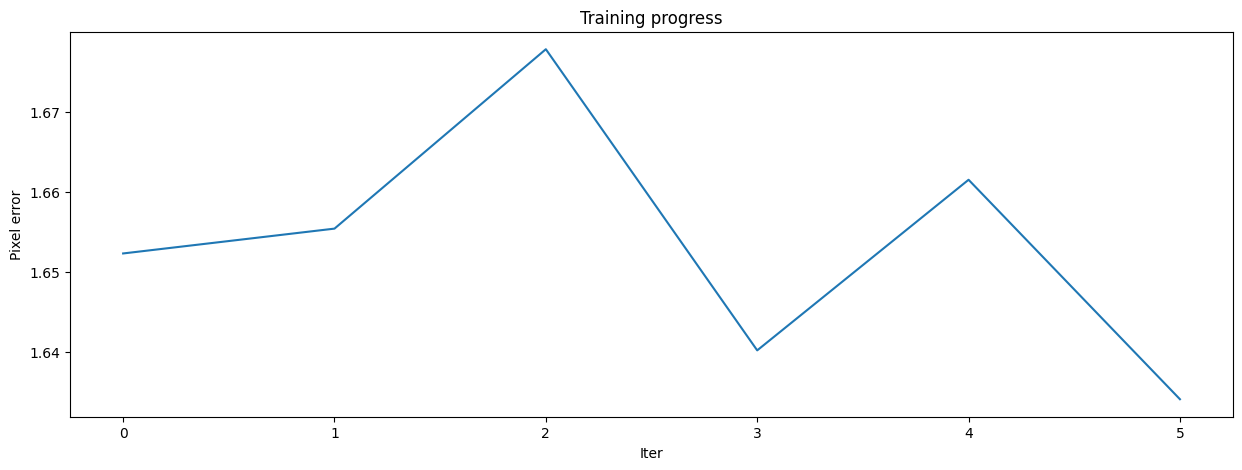

In [17]:
#@title 4.3.3 Visualize training results
import matplotlib.pyplot as plt
import os

#@markdown Either select the folder named "LunaTokis..." stored on your Google Drive then check `selected_train_folder`, otherwise the last performed training will be visualized
select_train_folder = False #@param {type:"boolean"}

if select_train_folder:
  save_train_path = "/home/user2/project/CAFI/ZS4Mic/experiments/LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo"#@param {type:"string"}
else:
  save_train_path = "/home/user2/project/CAFI/ZS4Mic/experiments/LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo"

# select the most recent trainings log file
log_file_name = [i for i in os.listdir(save_train_path) if "log" in i][-1]
log_file_path = os.path.join(save_train_path, log_file_name)
train_list = []
# save all the pixel error values in a list
with open(log_file_path) as f:
  for i in f:
    if "l_pix" in i:
       train_list.append(i[-12:])
train_list = [float(i[:-3]) for i in train_list]

num_items = len(train_list)
x_axis = [i for i in range(0,num_items)]

plt.figure(figsize=(15, 5))
plt.plot(x_axis, train_list)
plt.title("Training progress")
plt.xlabel("Iter")
plt.ylabel("Pixel error")


# **5. Perform Interpolation and/or Lateral Image upscaling**
---

After training or fine tuning of the network is finished you can just select the folder with images which you want to interpolate and upscale and check the dimensions that you want to improve.

### **5.1 Perform ZoomInterpolation**

#### Select pretrained model from drive to use for network (optional)
Otherwise our provided pretained networks will be used.

In [18]:
#@title  Select pretrained model from drive to use for network
#@markdown Run this cell to replace your previously fine-tuned network model with the right zoomfactor to be used for the network.
import os
import shutil

select_model = "/home/user2/project/CAFI/ZS4Mic/experiments/LunaTokis_scratch_b16p32f5b40n7l1_600k_Vimeo/models/100_G.pth"#@param {type:"string"}
#@markdown Select the zoomfactor model that you want to replaced.
zoomfactor = 1 #@param ["1", "2", "4"] {type:"raw"}

path_1x = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_1x.pth"
path_2x = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_2x.pth"
path_4x = "/home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_4x.pth"
if zoomfactor ==1:
    os.remove(path_1x)
    shutil.copy(select_model, path_1x)
elif zoomfactor ==2:
    os.remove(path_2x)
    shutil.copy(select_model, path_2x)
elif zoomfactor ==2:
    os.remove(path_4x)
    shutil.copy(select_model, path_4x)


####Run Interpolation or/and resolution upscaling

In [19]:
#@markdown #Run Interpolation or/and resolution upscaling
############ SELECT OPTIONS ################
############################################
############################################
##@markdown Large images bigger than 512px are split to smaller sizes that can be set by determining the divisor.

# Customized functions for image preparation: splitting, augmentation
import sys
sys.path.insert(0,'/home/user2/project/CAFI/ZS4Mic/load_functions')
import os
import pandas as pd
import shutil

from datetime import datetime
from skimage import io
from tqdm import tqdm
from prepare_split_images import bcolors
from prepare_split_images import img_split_pipeline
from prepare_for_zoominterpolation import get_zoomfactor
from prepare_for_zoominterpolation import data_preparation_for_zoominterpolation
from prepare_for_zoominterpolation import prepare_files_for_zoominterpolation_step
from prepare_for_zoominterpolation import save_interpolated_image

#@markdown **Select the folder where the images are located**
Source_path = "/home/user2/project/CAFI/ZS4Mic/demo/RECEPTOR_snr_2_density_low" #@param {type:"string"}
Saving_path = "/".join(Source_path.split("/")[:-1])

#@markdown Provide the size of the images
img_size = 512 #@param {type:"integer"}
if img_size<=512:
  divisor = img_size
else:
  divisor = 512


# Choose option for zoom or and interpolation with or without downsampling
# folder_option = "upsample-t" #@param ["downsample-t", "downsample-z", "upsample-t", "upsample-z", "zoom"]
perform_t_interpolation = True #@param {type:"boolean"}
perform_z_interpolation = False #@param {type:"boolean"}


zoomfactor = 1 #@param ["1", "2", "4", "8"] {type:"raw"}
zoomfactor_1, zoomfactor_2 = get_zoomfactor(zoomfactor)

remove_folder = []
#######################
### T-interpolation ###

# OLD - ignor blur correction
# #@markdown Under certain circumstances the interpolated image is brighter and pixelated compared to the normal zoomed ones. Then this option helps to reduce the differences by blurring it with a 3x3 kernal and ajusting the gamma for the images to make them more similar.
blur_and_brightness_correction = False ##param{type:"boolean"}

if perform_t_interpolation == True:
  folder_option_1 = "upsample-t"

  print(Source_path, Saving_path, divisor)
  # function splits the image in smaller tiles if it is bigger than 512 due to RAM limitations - will be reconstructed later
  aug_saving_path, split_img_folder_path,  log_path_file, multiplyer, nr_z_slices, nr_channels, nr_timepoints, x_dim, y_dim, x_div, y_div, use_RGB = img_split_pipeline(Source_path, Saving_path, divisor)

  print(aug_saving_path, split_img_folder_path,  log_path_file)
  # create new folder for image separation
  save_location = "/".join(split_img_folder_path.split("/")[:-1])
  folder_name = f"{divisor}_img_separation"
  save_location = os.path.join(save_location,folder_name)
  if not os.path.exists(save_location):
    os.mkdir(save_location)
  os.chdir(save_location)

  # Files are split into separate folder
  print(folder_option_1, save_location, split_img_folder_path)
  sub_save_location = data_preparation_for_zoominterpolation(folder_option_1, save_location, split_img_folder_path)

  # this function changes several files in the repo to fit the right settings such as resolution scale factor
  img_folder_path_interpolate = prepare_files_for_zoominterpolation_step(sub_save_location, 1) # last option is zoom factor

# OLD - ignor blur correction
  # #@markdown Under certain circumstances the interpolated image is brighter and pixelated compared to the normal zoomed ones. Then this option helps to reduce the differences by blurring it with a 3x3 kernal and ajusting the gamma for the images to make them more similar.
  blur_and_brightness_correction = False ##param{type:"boolean"}
  os.chdir("/home/user2/project/CAFI/ZS4Mic/codes")
  !python test_new.py  --corr $blur_and_brightness_correction

  # rename the folder that was created with date at the beginning
  today = datetime.now()
  date_info = today.strftime('%Y%m%d_%H%M%S')
  interpolate_location = "/home/user2/project/CAFI/ZS4Mic/results/Custom_"+date_info
  os.rename("/home/user2/project/CAFI/ZS4Mic/results/Custom", interpolate_location)




  Source_path = save_interpolated_image(interpolate_location, Saving_path, log_path_file, divisor, 1, folder_option_1, use_RGB) # zoomfactor 1
  remove_folder.append(Source_path)

#######################
### z-interpolation ###

if perform_z_interpolation == True:
  folder_option_2 = "upsample-z"

  Saving_path = "/".join(Source_path.split("/")[:-1])

  # performs the splitting and datapreparation pipeline
  aug_saving_path, split_img_folder_path,  log_path_file, multiplyer, nr_z_slices, nr_channels, nr_timepoints, x_dim, y_dim, x_div, y_div, use_RGB = img_split_pipeline(Source_path, Saving_path, divisor)

  # create new folder for image separation
  save_location = "/".join(split_img_folder_path.split("/")[:-1])
  folder_name = f"{divisor}_img_separation"
  save_location = os.path.join(save_location,folder_name)
  if not os.path.exists(save_location):
    os.mkdir(save_location)
  os.chdir(save_location)

  sub_save_location = data_preparation_for_zoominterpolation(folder_option_2, save_location, split_img_folder_path)

  img_folder_path_interpolate = prepare_files_for_zoominterpolation_step(sub_save_location, 1)

  %reload_ext autoreload
  os.chdir("/home/user2/project/CAFI/ZS4Mic/codes")
  !python test_new.py  --corr $blur_and_brightness_correction


  today = datetime.now()
  date_info = today.strftime('%Y%m%d_%H%M%S')
  interpolate_location = "/home/user2/project/CAFI/ZS4Mic/results/Custom_"+date_info
  os.rename("/home/user2/project/CAFI/ZS4Mic/results/Custom", interpolate_location)

  Source_path = save_interpolated_image(interpolate_location, Saving_path, log_path_file, divisor, 1, folder_option_2, use_RGB) # zoomfactor choses as 1
  remove_folder.append(Source_path)

if zoomfactor_1 != 1:
  folder_option_2 = "zoom"
  Saving_path = "/".join(Source_path.split("/")[:-1])

  aug_saving_path, split_img_folder_path,  log_path_file, multiplyer, nr_z_slices, nr_channels, nr_timepoints, x_dim, y_dim, x_div, y_div, use_RGB = img_split_pipeline(Source_path, Saving_path, divisor)

  # create new folder for image separation
  save_location = "/".join(split_img_folder_path.split("/")[:-1])
  folder_name = f"{divisor}_img_separation"
  save_location = os.path.join(save_location,folder_name)
  if not os.path.exists(save_location):
    os.mkdir(save_location)
  os.chdir(save_location)

  sub_save_location = data_preparation_for_zoominterpolation(folder_option_2, save_location, split_img_folder_path)

  img_folder_path_interpolate = prepare_files_for_zoominterpolation_step(sub_save_location, zoomfactor_1)

  %reload_ext autoreload
  os.chdir("/home/user2/project/CAFI/ZS4Mic/codes")
  !python test_new.py  --corr $blur_and_brightness_correction


  today = datetime.now()
  date_info = today.strftime('%Y%m%d_%H%M%S')
  interpolate_location = "/home/user2/project/CAFI/ZS4Mic/results/Custom_"+date_info
  os.rename("/home/user2/project/CAFI/ZS4Mic/results/Custom", interpolate_location)

  Source_path = save_interpolated_image(interpolate_location, Saving_path, log_path_file, divisor, zoomfactor_1, folder_option_2, use_RGB)
  remove_folder.append(Source_path)


if zoomfactor_2 != 1:
  folder_option_2 = "zoom"
  img_size = img_size*zoomfactor_1
  if img_size<=512:
    divisor = img_size
  else:
    divisor = 512
  Saving_path = "/".join(Source_path.split("/")[:-1])

  aug_saving_path, split_img_folder_path,  log_path_file, multiplyer, nr_z_slices, nr_channels, nr_timepoints, x_dim, y_dim, x_div, y_div, use_RGB = img_split_pipeline(Source_path, Saving_path, divisor)

  # create new folder for image separation
  save_location = "/".join(split_img_folder_path.split("/")[:-1])
  folder_name = f"{divisor}_img_separation"
  save_location = os.path.join(save_location,folder_name)
  if not os.path.exists(save_location):
    os.mkdir(save_location)
  os.chdir(save_location)

  sub_save_location = data_preparation_for_zoominterpolation(folder_option_2, save_location, split_img_folder_path)

  img_folder_path_interpolate = prepare_files_for_zoominterpolation_step(sub_save_location, zoomfactor_2)

  %reload_ext autoreload
  os.chdir("/home/user2/project/CAFI/ZS4Mic/codes")
  !python test_new.py  --corr $blur_and_brightness_correction


  today = datetime.now()
  date_info = today.strftime('%Y%m%d_%H%M%S')
  interpolate_location = "/home/user2/project/CAFI/ZS4Mic/results/Custom_"+date_info
  os.rename("/home/user2/project/CAFI/ZS4Mic/results/Custom", interpolate_location)

  Source_path = save_interpolated_image(interpolate_location, Saving_path, log_path_file, divisor, zoomfactor_2, folder_option_2, use_RGB)
  remove_folder.append(Source_path)


#@markdown Provide a folder path on your gdrive to save the zoominterpolation result
Save_path = "/home/user2/project/CAFI/ZS4Mic/sample_data" #@param {type:"string"}

if not os.path.exists(Save_path):
  os.mkdir(Save_path)

folder_name = Source_path.split("/")[-1]
destination = os.path.join(Save_path, folder_name)
shutil.copytree(Source_path, destination)

# saves final result in the folder named "final result"
# I created it in two folders to make the run from the notebook easier for the user at the beginning to be able to do the quality controle with a detemined folder name "final_result"
final_date = Saving_path + f"/{date_info}_final_result"
final_demo = Saving_path + "/final_result"
if os.path.exists(final_demo):
  shutil.rmtree(final_demo)
shutil.copytree(Source_path, final_date)
shutil.copytree(Source_path, final_demo)

for path in remove_folder:
  shutil.rmtree(path)

#@markdown Result image sequence will be saved in a folder called `./final_result` and in the folder including the date at the beginning.




/home/user2/project/CAFI/ZS4Mic/demo/RECEPTOR_snr_2_density_low /home/user2/project/CAFI/ZS4Mic/demo 512
(100, 1, 512, 512)
The Resolution x is: 512
The Resolution y is: 512
The number of z-slizes is: 1
The number of timepoints: 100


  0%|                                                                                                                                                                                           | 0/1 [00:00<?, ?it/s]

(100, 1, 512, 512)
The Resolution x is: 512
The Resolution y is: 512
The number of z-slizes is: 1
The number of timepoints: 100
saving image img-000_fraction-00


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.47it/s]


/home/user2/project/CAFI/ZS4Mic/demo/spit_source /home/user2/project/CAFI/ZS4Mic/demo/spit_source/2024030516_160507_split /home/user2/project/CAFI/ZS4Mic/demo/split_log.csv
upsample-t /home/user2/project/CAFI/ZS4Mic/demo/spit_source/512_img_separation /home/user2/project/CAFI/ZS4Mic/demo/spit_source/2024030516_160507_split
The image dimensions are: (100, 1, 512, 512)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:29<00:00, 29.54s/it]


24-03-05 16:05:40.191 - INFO: Data: Custom - ../test_example/*
24-03-05 16:05:40.191 - INFO: Padding mode: replicate
24-03-05 16:05:40.191 - INFO: Model path: /home/user2/project/CAFI/ZS4Mic/experiments/pretrained_models/pretrained_1x.pth
24-03-05 16:05:40.191 - INFO: Model parameters: 11.102771 M
24-03-05 16:05:40.191 - INFO: Save images: True
24-03-05 16:05:40.191 - INFO: Flip Test: False
100%|████████████████████████████████████████████| 1/1 [01:46<00:00, 106.50s/it]
img_list is: ['i-000']
fraction_list is: ['f-00']
zt_list is: ['z-000']
Product_image_shape is: 512
Files is: ['00000001.png', '00000002.png', '00000003.png', '00000004.png', '00000005.png', '00000006.png', '00000007.png', '00000008.png', '00000009.png', '00000010.png', '00000011.png', '00000012.png', '00000013.png', '00000014.png', '00000015.png', '00000016.png', '00000017.png', '00000018.png', '00000019.png', '00000020.png', '00000021.png', '00000022.png', '00000023.png', '00000024.png', '00000025.png', '00000026.png'

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.71s/it]


There are 1 images to reconstruct


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]



# **6 Error mapping and quality metrics estimation**
---

**WORKFLOW**

- You can compare the quality of first downsampled images (performed in section 3) and re-interpolated with the ground truth image used for down-scaling
- The first cells loads the images and shows the dimensions
- The second cell evaluates the image and saves 2 csv files showing the mean quality values and the other one showing the quality values for each slice. It also saves the SSIM and RMSE maps of the dataset in the same folder
- The third cell shows you SSIM and RMSE maps of a selected image slice

#### Explanation of evaluation metrics
<font size = 3>This option can be used to compare the downsampled-z or downsample-t or zoom option with the original file to estimate the performance of the network
---

<font size = 2>This section will display SSIM maps and RSE maps as well as calculating total SSIM, NRMSE and PSNR metrics for all the images provided in the "GT_Image_QC" and "Prediction_Image_QC" !

<font size = 3>**1. The SSIM (structural similarity) map**

<font size = 2>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better. The SSIM maps are constructed by calculating the SSIM metric in each pixel by considering the surrounding structural similarity in the neighbourhood of that pixel (currently defined as window of 11 pixels and with Gaussian weighting of 1.5 pixel standard deviation, see our Wiki for more info).

<font size=2>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size=2>**The output below shows the SSIM maps with the mSSIM**

<font size = 3>**2. The RSE (Root Squared Error) map**

<font size = 2>This is a display of the root of the squared difference between the normalized predicted and target or the source and the target. In this case, a smaller RSE is better. A perfect agreement between target and prediction will lead to an RSE map showing zeros everywhere (dark).


<font size =2>**NRMSE (normalised root mean squared error)** gives the average difference between all pixels in the images compared to each other. Good agreement yields low NRMSE scores.

<font size = 2>**PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.

<font size=2>**The output below shows the RSE maps with the NRMSE and PSNR values.**

<font size=2>**Quality check just works for not RGB images**

In [ ]:
#@title ####**6.1 Check for image shift**
#@markdown Select on sample predicted image and one GT image for comparison. This cell compares
### Check for a channel shift of the reconstructed image
import sys
sys.path.insert(0,'/home/user2/project/CAFI/ZS4Mic/load_functions')
from prepare_for_zoominterpolation import correct_channels
from prepare_for_zoominterpolation import bcolors
from quality_metrics_estimation import create_shift_image
from quality_metrics_estimation import norm_minmse
from quality_metrics_estimation import structural_similarity
from quality_metrics_estimation import psnr
from quality_metrics_estimation import get_full_file_paths
from skimage import io
import pandas as pd
import numpy as np
# program a channel_shift
Prediction_Image_QC = "/home/user2/project/CAFI/ZS4Mic/demo/final_result" #@param{type:"string"}
GT_Image_QC = "/home/user2/project/CAFI/ZS4Mic/demo/sim_particles_2DF_256" #@param{type:"string"}

# read out all images in the selected folder
prediction_flist_paths = get_full_file_paths(Prediction_Image_QC)
GT_flist_paths = get_full_file_paths(GT_Image_QC)
prediction_flist_paths.sort()
GT_flist_paths.sort()

Predicted_image = prediction_flist_paths[-1]
GT_Image = GT_flist_paths[-1]

#@markdown You can either select a given image based on the t and z-slice. If unticked the center image of the z and z dimension will be selected automatically.
select_slices = True #@param {type:"boolean"}

int_img = io.imread(Predicted_image)
int_img, use_RGB = correct_channels(int_img)
print(int_img.shape)
print(use_RGB)


if select_slices:
  t_slice = 7 #@param {type:"raw"}
  z_slice = 0 #@param {type:"raw"}
  #@markdown If multi channel image choose the channel of interest:
  channel = 0 #@param {type:"raw"}
else:
  t_slice = t//2
  z_slice = z//2

# Check if the file is a RGB file
if use_RGB:
  t, z, y_dim, x_dim, c= int_img.shape
  int_img = int_img[t_slice, z_slice,:,:,channel]
else:
  t, z, y_dim, x_dim = int_img.shape
  int_img = int_img[t_slice, z_slice,:,:]

# int_img = int_img[t_slice, z_slice,:,:]
gt_img = io.imread(GT_Image)
gt_img, use_RGB = correct_channels(gt_img)

print(gt_img.shape)
if use_RGB:
  t, z, y_dim, x_dim, c= gt_img.shape
  gt_img = gt_img[t_slice, z_slice,:,:,channel]

else:
  t, z, y_dim, x_dim = gt_img.shape
  gt_img = gt_img[t_slice, z_slice,:,:]

# try different shifts
x_list = [-4,-3,-2,-1,0,1,2,3,4]
y_list = [-4,-3,-2,-1,0,1,2,3,4]
dict_NRMSE_values = {}
dict_SSIM_values = {}
dict_PSNR_values = {}

for y_shift in y_list:
  for x_shift in x_list:
    # print(temp_img.shape)
    shifted_img = create_shift_image(int_img, y_shift, x_shift)

    # evaluate SSIM, PSNR, NRMSE
    test_GT_norm, test_prediction_norm = norm_minmse(gt_img, shifted_img, normalize_gt=True)
    img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
    NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
    index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, test_prediction_norm, data_range=1.0, full=True)
    PSNR_GTvsPrediction = psnr(test_GT_norm, test_prediction_norm, data_range=1.0)


    dict_NRMSE_values[str(y_shift)+ "_" +str(x_shift)] = [NRMSE_GTvsPrediction]
    dict_SSIM_values[str(y_shift)+ "_" +str(x_shift)] = [index_SSIM_GTvsPrediction]
    dict_PSNR_values[str(y_shift)+ "_" +str(x_shift)] = [PSNR_GTvsPrediction]


    # print(f"y_shift {y_shift}, x_shift  {x_shift}")
    # print(f"NRMSE_GTvsPrediction {NRMSE_GTvsPrediction}, index_SSIM_GTvsPrediction {index_SSIM_GTvsPrediction}, PSNR_GTvsPrediction {PSNR_GTvsPrediction}")


## uncommented - COMMENT: removed it because confusing for the user. just useful if for some reason the image gets shifted for some pixels in the x or y direction. then this could be uncommented to find the number of shifted pixels and correct it accordingly.

# import pylab as pl
# # pixel_shift evaluation
# pd.DataFrame.from_dict(dict_SSIM_values).transpose().plot.bar(figsize=(25,2))
# print(f"best conditions according to SSIM: {max(dict_SSIM_values, key=dict_SSIM_values.get)}")
# pl.suptitle("Different values for SSIM accoring to different x-y shifts - max best")


# pd.DataFrame.from_dict(dict_PSNR_values).transpose().plot.bar(figsize=(25,2))
# print(f"best conditions according to PSNR: {max(dict_PSNR_values, key=dict_PSNR_values.get)}")
# pl.suptitle("Different values for PSNR accoring to different x-y shifts - max best")

# pd.DataFrame.from_dict(dict_NRMSE_values).transpose().plot.bar(figsize=(25,2))
# print(f"best conditions according to NRMSE: {min(dict_NRMSE_values, key=dict_NRMSE_values.get)}")
# pl.suptitle("Different values for PSNR accoring to different y-x shifts - min best")



#################################################################
#@title ####**4.3.3 Perform quality control over all files**
#@markdown Choose the folders to compare original with predicted images with the ground truth images for quality control
from prepare_for_zoominterpolation import  make_folder_with_date
from quality_metrics_estimation import get_full_file_paths
import csv
import os

# Prediction_Image_QC = "/content/gdrive/MyDrive/1.2_BIG_DATA_PhD_Project_2/0.PAPER_EXPERIMENT/20210321_Tchern_dataset_Usecase/Zoomed_512_T/128_13_BIC_2x" #@param{type:"string"}
# GT_Image_QC = "/content/gdrive/MyDrive/1.2_BIG_DATA_PhD_Project_2/0.PAPER_EXPERIMENT/20210321_Tchern_dataset_Usecase/Zoomed_512_T/256_13" #@param{type:"string"}

# Create quality control folder
base_folder = "/".join(Prediction_Image_QC.split("/")[:-1])
exp_name = Prediction_Image_QC.split("/")[-1]
quality_test_folder = os.path.join(base_folder, f"quality_tests-{exp_name}")

print(quality_test_folder)
if os.path.exists(quality_test_folder)==False:
  os.mkdir(quality_test_folder)
# quality_test_folder = make_folder_with_date(base_folder, f"{exp_name}_quality_tests")




if len(prediction_flist_paths) != len(GT_flist_paths):
  print(f"{bcolors.WARNING}There is an unequal number of images in the two selected folders{bcolors.ENDC}")
else:
  print(f"There are {len(GT_flist_paths)} files in both folders")

file_num = len(GT_flist_paths)

for num in range(file_num):
    # create log-csv files for the mean of each stack and the similarity/error within each image slice
    with open(quality_test_folder +f'/{exp_name}_every_slice{num}.csv', 'w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow(["File", "Z-Dimension", "T-Dimension", "index_SSIM_GTvsPrediction", "NRMSE_GTvsPrediction","PSNR_GTvsPrediction"])

    with open(quality_test_folder +f'/{exp_name}_mean{num}.csv', 'w', newline='') as file:
          writer = csv.writer(file)
          writer.writerow(["File", "mSSIM_GvP_mean", "NRMSE_GvP_mean", "PSNR_GvP_mean"])




In [ ]:
#@title ####**6.2 Run quality control**

#@markdown This cells saves the evaluation images and values for SSIM, PSNR, MSR in "*.csv" files.
#@markdown You can either select a manual shift for the x and y-dimension of the images. If unticked the best conditions calculated in **Section 6.1** will be take.

from tqdm import tqdm
import os

select_manual_shift = True
y_shift = 0
x_shift = 0
#@markdown If multi channel image choose the channel of interest:
channel = 0 #@param {type:"raw"}

## uncommented - COMMENT: removed it because confusing for the user. just useful if for some reason the image gets shifted for some pixels in the x or y direction. then this could be uncommented to find the number of shifted pixels and correct it accordingly.
# if select_manual_shift:
#   y_shift = 0 #@param {type:"raw"}
#   x_shift =  0#@param {type:"raw"}
#   #@markdown If multi channel image choose the channel of interest:
#   channel = 0 #@param {type:"raw"}
# else:
#   y_shift = int(max(dict_PSNR_values, key=dict_PSNR_values.get).split("_")[0])
#   x_shift = int(max(dict_PSNR_values, key=dict_PSNR_values.get).split("_")[1])
#   channel = 0

# These lists will be used to collect all the metrics values per slice
file_name_list = []
T_slice_number_list = []
Z_slice_number_list = []
mSSIM_GvP_list = []
NRMSE_GvP_list = []
PSNR_GvP_list = []


img_GT = io.imread(GT_flist_paths[0])
img_GT, use_RGB = correct_channels(img_GT)

img_prediction = io.imread(prediction_flist_paths[0])
img_prediction, use_RGB = correct_channels(img_prediction)


# img_prediction = img_prediction.get_image_data("TZXY")

t_slices = img_prediction.shape[0]
z_slices = img_prediction.shape[1]


# here we analyse just the channel zero. If other channels are of interest please change the number in the sliceing.
# if the number of frames gets shifted by 1, here we slice the image to the smaller size
if use_RGB:
  img_prediction = img_prediction[:t_slices,:z_slices,:,:,channel]
  img_GT = img_GT[:t_slices,:z_slices,:,:,channel]

print(img_GT.shape)
print(img_prediction.shape)
print(f"The t-dimension is {t_slices}, and the z-dimension is {z_slices}")

#  Create a zero matrix as template for the images
img_SSIM_GTvsPrediction_stack = np.zeros((t_slices, z_slices, img_prediction.shape[2], img_prediction.shape[3]))
img_RSE_GTvsPrediction_stack = np.zeros((t_slices, z_slices, img_prediction.shape[2], img_prediction.shape[3]))

# compare each image - slice per slice and save the calculation in csvs and as new image

num = 0
for pred_file_path, GT_file_path in zip(prediction_flist_paths, GT_flist_paths):
    # load the two images
    img_prediction = io.imread(pred_file_path)
    img_prediction, use_RGB = correct_channels(img_prediction)

    # img_prediction = img_prediction.get_image_data("TZXY")
    img_GT = io.imread(GT_file_path)
    img_GT, use_RGB = correct_channels(img_GT)

    if use_RGB:
      img_prediction = img_prediction[:t_slices,:z_slices,:,:,channel]
      img_GT = img_GT[:t_slices,:z_slices,:,:,channel]

    # img_GT = img_GT.get_image_data("TZXY")
    file_name = "/".join(GT_file_path.split("/")[-1:])
    for z in tqdm(range(z_slices)):
        for t in range(t_slices):

          # --------------------------- perform optimal shift---------------------------

          one_img_prediction = img_prediction[t][z]
          one_img_prediction = create_shift_image(one_img_prediction, y_shift, x_shift)

          # -------------------------------- Prediction --------------------------------

          test_GT_norm, test_prediction_norm = norm_minmse(img_GT[t][z], one_img_prediction, normalize_gt=True)

          # ------------------------ Calculate the SSIM metric and maps ----------------
          # Calculate the SSIM maps and index
          index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, test_prediction_norm, data_range=1.0, full=True)

          #Calculate ssim_maps
          # img_SSIM_GTvsPrediction_stack[t][z] = np.float32(img_SSIM_GTvsPrediction)
          img_SSIM_GTvsPrediction_stack[t][z] = img_SSIM_GTvsPrediction


          # ----------------------- Calculate the NRMSE metrics ------------------------
          # Calculate the Root Squared Error (RSE) maps
          img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))

          # Calculate SE maps
          img_RSE_GTvsPrediction_stack[t][z] = np.float32(img_RSE_GTvsPrediction)


          # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
          NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))

          # Calculate the PSNR between the images
          PSNR_GTvsPrediction = psnr(test_GT_norm, test_prediction_norm, data_range=1.0)

          with open(quality_test_folder +f'/{exp_name}_every_slice{num}.csv', 'a', newline='') as file:
              writer = csv.writer(file)
              writer.writerow([file_name, z, t, index_SSIM_GTvsPrediction, NRMSE_GTvsPrediction,PSNR_GTvsPrediction])

          mSSIM_GvP_list.append(index_SSIM_GTvsPrediction)
          NRMSE_GvP_list.append(NRMSE_GTvsPrediction)
          PSNR_GvP_list.append(PSNR_GTvsPrediction)

    # ----------- Change the stacks to 32 bit images and fix channels -----------
    from skimage import img_as_float32
    img_SSIM_GTvsPrediction_stack_32 = img_as_float32(img_SSIM_GTvsPrediction_stack, force_copy=False)
    # img_SSIM_GTvsPrediction_stack_32= reshape_data(img_SSIM_GTvsPrediction_stack_32, "TZXY","STCZXY")

    img_RSE_GTvsPrediction_stack_32 = img_as_float32(img_RSE_GTvsPrediction_stack, force_copy=False)
    # img_RSE_GTvsPrediction_stack_32= reshape_data(img_RSE_GTvsPrediction_stack_32, "TZXY","STCZXY")


    # ----------- Saving the error map stacks -----------
    path_file = os.path.join(quality_test_folder, file_name)
    SSIM_path = path_file[:-4] + "SSIM_GTvsPrediction.tif"
    RSE_path =  path_file[:-4] + 'RSE_GTvsPrediction.tif'

    io.imsave(SSIM_path,img_SSIM_GTvsPrediction_stack_32)
    io.imsave(RSE_path,img_RSE_GTvsPrediction_stack_32)

    # ----------- Saving mean errors in CSV -----------
    mSSIM_GvP_mean = (sum(mSSIM_GvP_list)/len(mSSIM_GvP_list))
    NRMSE_GvP_mean = (sum(NRMSE_GvP_list)/len(NRMSE_GvP_list))
    PSNR_GvP_mean = (sum(PSNR_GvP_list)/len(PSNR_GvP_list))
    with open(quality_test_folder + f'/{exp_name}_mean{num}.csv', 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([file_name, mSSIM_GvP_mean, NRMSE_GvP_mean, PSNR_GvP_mean])
    num += 1


In [ ]:
#@title ####**6.3 Visualize single images from a selected file**

#@markdown Select a file number (based on the number of image that were processed before) and the t/z slices of images to compare
#@markdown (Index starts with 0)
import matplotlib.pyplot as plt
from prepare_for_zoominterpolation import bcolors

# nr_file =  0#@param {type:"integer"}
z_dimension =  0#@param {type:"integer"}
t_dimension =  3#@param {type:"integer"}


select_manual_shift = True
y_shift = 0
x_shift = 0
#@markdown If multi channel image choose the channel of interest:
channel = 0 #@param {type:"raw"}


## uncommented - COMMENT: removed it because confusing for the user. just useful if for some reason the image gets shifted for some pixels in the x or y direction. then this could be uncommented to find the number of shifted pixels and correct it accordingly.

# #@markdown You can either select a manual shift for the x and y-dimension of the images. If unticked the best conditions ecaluated in **Section 3.4.2** will be take.
# select_manual_shift = True #@param {type:"boolean"}
# if select_manual_shift:
#   y_shift = 0 #@param {type:"raw"}
#   x_shift = 0 #@param {type:"raw"}
#   #@markdown If multi channel image choose the channel of interest:
#   channel =  0#@param {type:"raw"}
# else:
#   y_shift = int(max(dict_PSNR_values, key=dict_PSNR_values.get).split("_")[0])
#   x_shift = int(max(dict_PSNR_values, key=dict_PSNR_values.get).split("_")[1])
#   channel = 0

display_all_files =True
if display_all_files== True:
   for nr_file in range(file_num):
        Prediction_Image_QC = prediction_flist_paths[nr_file]
        GT_Image_QC = GT_flist_paths[nr_file]

        # get file names of both
        file_name_pred = "/".join(Prediction_Image_QC.split("/")[-1:])
        file_name_GT = "/".join(GT_Image_QC.split("/")[-1:])

        # load the two images
        img_prediction = io.imread(Prediction_Image_QC)
        img_prediction, use_RGB = correct_channels(img_prediction)

        # img_prediction = img_prediction.get_image_data("TZXY")
        img_GT = io.imread(GT_Image_QC)
        img_GT, use_RGB = correct_channels(img_GT)

        # correct for RGB and uneven slice number
        if use_RGB:
          img_prediction = img_prediction[:t_slices,:z_slices,:,:,channel]
          img_GT = img_GT[:t_slices,:z_slices,:,:,channel]
        # img_GT = img_GT.get_image_data("TZXY")

        prediction_dim =img_prediction.shape
        print(f"Source dimension: {prediction_dim}")
        GT_dim =img_GT.shape
        print(f"Target dimension: {GT_dim}")

        #prepare slice
        prediction_img_slice = img_prediction[t_dimension,z_dimension,:,:]
        GT_img_slice = img_GT[t_dimension,z_dimension,:,:]
        print(GT_img_slice.shape)


        # -------------------------------- Calculate the SSIM metric and maps --------------------------------

        img_GT_slice = img_GT[t_dimension][z_dimension]
        img_prediction_slice = img_prediction[t_dimension][z_dimension]
        img_prediction_slice = create_shift_image(img_prediction_slice, y_shift, x_shift)

        test_GT_norm, test_prediction_norm = norm_minmse(img_GT_slice, img_prediction_slice, normalize_gt=True)

        # Calculate the SSIM maps and index data_range=test_prediction_norm.max() - test_prediction_norm.min()
        index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = structural_similarity(test_GT_norm, test_prediction_norm, data_range=1, full=True)
        img_SSIM_GTvsPrediction = np.float32(img_SSIM_GTvsPrediction)

        # Calculate the RSE
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        img_RSE_GTvsPrediction = np.float32(img_RSE_GTvsPrediction)

        # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))

        # Calculate the PSNR between the images
        PSNR_GTvsPrediction = psnr(test_GT_norm, test_prediction_norm, data_range=1.0)


        # -------------------------------- Plotting --------------------------------

        plt.figure(figsize=(15,15))
        # Currently only displays the last computed set, from memory

        #Setting up colours
        cmap = plt.cm.Greys
        cmap = cmap.reversed()

        # Target (Ground-truth)
        plt.subplot(2,3,1)
        plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)
        plt.xlabel(f'image {file_name}')
        plt.imshow(img_GT_slice, cmap = cmap)
        plt.title('GT (slice #'+str(t_dimension)+'-'+str(t_dimension)+')')


        # Source
        plt.subplot(2,3,2)
        plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)
        plt.xlabel(f'image {file_name}')
        plt.imshow(img_prediction_slice, aspect='equal', cmap = cmap)
        plt.title('Prediction (slice #'+str(t_dimension)+'-'+str(t_dimension)+')')


        #Setting up colours
        plt.figure(figsize=(15,15))
        cmap = plt.cm.CMRmap

        # img_SSIM_GTvsPrediction
        plt.subplot(2,3,1)
        plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)
        plt.xlabel(f'image {file_name}')
        img_SSIM_GTvsPrediction_plt = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
        plt.colorbar(img_SSIM_GTvsPrediction_plt,fraction=0.046, pad=0.04)
        plt.title('iSSIM map: GT vs. Prediction (slice #'+str(t_dimension)+'-'+str(t_dimension)+')')

        # img_RSE_GTvsPrediction
        plt.subplot(2,3,2)
        plt.tick_params(
            axis='both',      # changes apply to the x-axis and y-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,        # ticks along the top edge are off
            left=False,       # ticks along the left edge are off
            right=False,         # ticks along the right edge are off
            labelbottom=False,
            labelleft=False)
        plt.xlabel(f'image {file_name}')
        RSE_GTvsPrediction_plt = plt.imshow(img_RSE_GTvsPrediction, aspect='equal', cmap = cmap, vmin=0,vmax=1)
        plt.colorbar(RSE_GTvsPrediction_plt,fraction=0.046, pad=0.04)
        plt.title('img_RSE_GTvsPrediction (slice #'+str(t_dimension)+'-'+str(t_dimension)+')')

        print(f"{bcolors.WARNING}PSNR_GTvsPrediction:       {PSNR_GTvsPrediction}{bcolors.ENDC}")
        print(f"{bcolors.WARNING}NRMSE_GTvsPrediction:      {NRMSE_GTvsPrediction}{bcolors.OKBLUE}")
        print(f"{bcolors.WARNING}index_SSIM_GTvsPrediction: {index_SSIM_GTvsPrediction}{bcolors.OKGREEN}")




# Good Luck!